# $$Análise~de~Evasão~dos~Funcionários~IBM$$

### $$Quais~possíveis~fatores~estão~relacionados~com~a~evasão~dos~funcionários?$$

fonte dos dados: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

### Introdução

- Análise de RH é um campo de análise que se refere à implementação de um processo de análise no departamento de recursos humanos de uma organização, na esperança de melhorar o desempenho dos funcionários e o retorno sobre o investimento. A Análise de RH faz mais do que apenas coletar dados sobre a eficiência dos funcionários. Em vez disso, seu objetivo é fornecer uma compreensão de cada processo por meio da coleta de dados e da tomada de decisões relevantes sobre como usá-los para aprimorar esses processos.

- 'Attrition' dos funcionários mede o número de trabalhadores que deixaram uma organização e é uma métrica comum que as empresas usam para avaliar seu desempenho. Muitas vezes, há vários motivos pelos quais os funcionários deixam uma organização.

- Neste notebook, explorarei um conjunto de dados criado por cientistas de dados da IBM para analisar os fatores que levam ao evasão/desgaste dos funcionários. Os dados consistem em quase 1.500 funcionários atuais e antigos com informações relacionadas à satisfação no trabalho, equilíbrio entre vida profissional e pessoal, experiência, salário etc. Faremos a EDA com base em algumas perguntas.

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py

## Lendo e explorando o dataset

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/analise_dados/projetos/IBM HR Analytics/IBM_HR_Analytics.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Vemos que há 1470 linhas e 35 colunas;
Não há valores nulos.

In [4]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
# substituindo os valores No e Yes para 0 e 1
dataset['Attrition'] = dataset['Attrition'].factorize(['No','Yes'])[0]

## EDA

In [7]:
def barplot(coluna, flag):
    attrition = dataset[(dataset['Attrition'] != 0)]
    no_attrition = dataset[(dataset['Attrition'] == 0)]
    data = pd.DataFrame(pd.crosstab(dataset[coluna], dataset['Attrition']), )
    data['Attr%'] = data[1] / (data[1] + data[0]) * 100
    if flag == True:
        data = data.sort_values(1, ascending = False)

    color = ['#B9C0C9', 'red']
    bar1 = go.Bar(x = attrition[coluna].value_counts().keys().tolist(),
                  y = attrition[coluna].value_counts().values.tolist(),
                  name = 'Attrition',
                  marker = dict(color = 'red', line = dict(color = '#000000', width = 1)))

    bar2 = go.Bar(x = no_attrition[coluna].value_counts().keys().tolist(),
                  y = no_attrition[coluna].value_counts().values.tolist(),
                  name = 'No Attrition', opacity = 0.9,
                  marker = dict(color = '#B9C0C9', line = dict(color = '#000000', width = 1)))

    scatter = go.Scatter(x = data.index, y = data['Attr%'], yaxis = 'y2',
                        name = '% Attrition', opacity = 0.9,
                        marker = dict(color = 'darkblue', line = dict(color = '#000000', width=0.5)))

    layout = dict(title = str(coluna), xaxis = dict(), yaxis = dict(title = 'Count'),
                  yaxis2=  dict(range= [-0, 75], overlaying= 'y', anchor = 'x',
                  side = 'right', zeroline = False, showgrid = False, title = '% Attrition'))

    fig = go.Figure(data=[bar1, bar2, scatter], layout = layout)
    py.iplot(fig)

In [8]:
pie = go.Pie(labels = ['No attrition', 'Attrition'], values = dataset['Attrition'].value_counts(),
               textfont=dict(size=15),
               marker=dict(colors=['#B9C0C9', 'red'],
               line=dict(color='#000000', width=1.5)))
layout = dict(title = 'Distribuição da variável Attrition')
fig = dict(data = [pie], layout=layout)
py.iplot(fig)

#### Distribuição de evasão de funcionários por gênero

In [9]:
barplot('Gender', False)

De acordo com o gráfico apresentado, os homens demonstram uma taxa de evasão superior, atingindo 17%, em comparação com as mulheres, que registram uma taxa de 14%.

#### Qual é o efeito da idade na evasão dos funcionários?

In [10]:
barplot('Age', False)

Conforme demonstrado no gráfico acima, a evasão atinge seu pico entre as faixas etárias de 18 a 20 anos, atingindo uma porcentagem superior a 50%. À medida que a idade aumenta, a taxa de evasão gradualmente diminui, pois as pessoas buscam maior estabilidade em seus empregos nessa fase da vida. Além disso, em idades mais jovens, ou seja, entre 18 e 20 anos, as chances de um funcionário deixar a organização são significativamente maiores, uma vez que estão em um período de exploração. A taxa de evasão atinge um ponto de equilíbrio em torno dos 25 anos.

#### A renda é o principal fator de evasão dos funcionários?

In [11]:
plot_df = dataset.sort_values(by = "Attrition")
fig = px.histogram(plot_df, x = 'MonthlyIncome', color = 'Attrition',
                 opacity = 0.8, histnorm = 'density', barmode = 'overlay', marginal='box',
                 color_discrete_map = {'Yes': '#B9C0C9', 'No': '#CDBBA7'})

fig.update_layout(title_text = 'Distribuição da renda mensal por status de evasão',
                  xaxis_title = 'Renda mensal, $', yaxis_title = 'Densidade', font_color = '#28221D',
                  paper_bgcolor = '#F4F2F0', plot_bgcolor = '#F4F2F0', legend_traceorder = 'reversed')
fig.show()

A distribuição da renda mensal para funcionários atuais e antigos é positivamente distorcida e, em geral, mais baixa entre os funcionários que saíram. Os ex-funcionários tinham uma renda mensal média mais de US$ 2.000 inferior à dos funcionários atuais. Quanto maior a renda mensal, menor a taxa de evasão.

#### O departamento de trabalho afeta na evasão?

In [12]:
barplot('Department', True)

Esses dados se referem apenas a três departamentos-chave, sendo o departamento de vendas (20%) o que apresenta as taxas de evasão mais elevadas, seguido pelo departamento de recursos humanos (19%). Por outro lado, o departamento de Pesquisa e Desenvolvimento (13%) exibe as taxas de evasão mais baixas, o que indica estabilidade e satisfação dentro do departamento, como evidenciado pelo gráfico acima.

#### Como a satisfação com o ambiente afeta a evasão?

In [13]:
sats_att = dataset.groupby(['EnvironmentSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name = 'Counts')
px.area(sats_att, x = 'EnvironmentSatisfaction', y = 'Counts',color = 'Attrition',title = 'Nível de satisfação com o ambiente conta com a participação das pessoas em uma organização')

In [14]:
barplot('EnvironmentSatisfaction', False)

Na faixa de satisfação entre os níveis 1-2, observa-se uma ligeira diminuição nas probabilidades de as pessoas deixarem a organização, sugerindo uma maior expectativa de que permaneçam. À medida que avançamos do nível 2 para o nível 3 e alcançamos níveis de satisfação mais elevados, a taxa de evasão praticamente se estabiliza. Isso indica uma maior fidelidade das pessoas à organização.

In [15]:
barplot('BusinessTravel', False)

A análise do gráfico revela que a maioria dos funcionários que raramente viaja não deixa a empresa. Isso sugere que a frequência das viagens de negócios não exerce um impacto significativo no índice de desgaste da empresa. Portanto, conclui-se que as viagens de negócios não representam um dos principais fatores que contribuem para a evasão, mas é importante notar que os funcionários que viajam com frequência apresentam a maior taxa de evasão.

In [16]:
barplot('DistanceFromHome', False)

A maior parte das pessoas que deixa a empresa reside a uma distância superior a 11-12 quilômetros das instalações da empresa.

#### Como a autossatisfação no trabalho afeta a evasão?

In [17]:
jsats_att = dataset.groupby(['JobSatisfaction','Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')
px.area(jsats_att, x = 'JobSatisfaction', y = 'Counts',color = 'Attrition')

In [18]:
barplot('JobSatisfaction', False)

À medida que a satisfação no ambiente de trabalho aumenta, observa-se uma redução nas taxas de evasão, conforme ilustrado no gráfico acima. Além disso, podemos deduzir que, no intervalo 1-2 (conforme evidenciado na satisfação com o ambiente), a taxa de evasão diminui.

#### Como o equilíbrio entre vida pessoal e profissional afeta as taxas gerais de evasão?

In [19]:
barplot('WorkLifeBalance', False)

As pessoas com níveis ruins de equilíbrio entre vida profissional e pessoal se adaptaram a seus empregos, mas, como visto nos parâmetros acima, com uma pontuação melhor de vida profissional, as pessoas estão mais acostumadas com a vida melhor e querem se desligar mais.

#### Como a experiência profissional afeta a evasão?

In [20]:
ncwrd_att=dataset.groupby(['NumCompaniesWorked','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(ncwrd_att,x='NumCompaniesWorked',y='Counts',color='Attrition')

Conforme ilustrado no gráfico anterior, fica claro que os colaboradores que começaram suas trajetórias profissionais na empresa, ou que se juntaram à organização nos estágios iniciais de suas carreiras, apresentam uma probabilidade maior de deixar a empresa em busca de oportunidades em outras organizações. Em contrapartida, aqueles que acumularam experiência trabalhando em diversas empresas tendem a permanecer na empresa em que ingressaram.

#### Como a duração do trabalho na função atual afeta a evasão?

In [21]:
barplot('YearsInCurrentRole', False)

Notamos que os indivíduos têm uma maior probabilidade de sair da organização nos primeiros anos de sua função. À medida que as pessoas permanecem na mesma função por um período prolongado, tendem a ficar por mais tempo na empresa, buscando oportunidades de avanço na carreira.

#### Os gerentes são o motivo da demissão de pessoas?

In [22]:
px.box(dataset, x="YearsAtCompany")

A maior parte dos colaboradores mantém sua posição na empresa por um período de 3 a 9 anos, com uma média de permanência de 5 anos. Será que essa mesma tendência se aplica aos gerentes? Vamos investigar para descobrir.

In [23]:
man_att=dataset.groupby(['YearsWithCurrManager','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(man_att,x='YearsWithCurrManager',y='Counts',color='Attrition',title='Contagem de pessoas que passam anos com um gerente em uma organização')

In [24]:
barplot('YearsWithCurrManager', False)

Os colaboradores costumam buscar novas oportunidades de emprego durante o primeiro ano de trabalho. Em um intervalo médio de 2 a 7 anos, é comum que considerem mudanças. No entanto, quando o tempo de interação com um gerente é substancialmente elevado em relação ao trabalho, os funcionários tendem a experimentar maior satisfação em suas posições. Isso, por sua vez, reduz significativamente a probabilidade de um funcionário solicitar demissão.

#### Qual é a porcentagem de evasão por cargo? Qual cargo tem a maior taxa de atrito? Qual tem a menor?

In [28]:
barplot('JobRole', True)

Os colaboradores que apresentam as maiores taxas de saída na empresa incluem representantes de vendas, profissionais de recursos humanos e técnicos de laboratório. Por outro lado, os cargos de nível mais elevado, como Diretor de Pesquisa, Gerente e Representante de Saúde, demonstram as taxas de evasão mais baixas.

In [25]:
for column in dataset.columns:
    print(f"{column}: Número de valores únicos: {dataset[column].nunique()}")
    print('---------------------------------------------------')

Age: Número de valores únicos: 43
---------------------------------------------------
Attrition: Número de valores únicos: 2
---------------------------------------------------
BusinessTravel: Número de valores únicos: 3
---------------------------------------------------
DailyRate: Número de valores únicos: 886
---------------------------------------------------
Department: Número de valores únicos: 3
---------------------------------------------------
DistanceFromHome: Número de valores únicos: 29
---------------------------------------------------
Education: Número de valores únicos: 5
---------------------------------------------------
EducationField: Número de valores únicos: 6
---------------------------------------------------
EmployeeCount: Número de valores únicos: 1
---------------------------------------------------
EmployeeNumber: Número de valores únicos: 1470
---------------------------------------------------
EnvironmentSatisfaction: Número de valores únicos: 4
---------

Notamos que as colunas "EmployeeCount," "Over18," e "StandardHours" possuem apenas um valor exclusivo cada, enquanto "EmployeeNumber" possui 1.470 valores exclusivos. Esses atributos não fornecem informações úteis para nossa análise, portanto, optaremos por remover essas colunas.

In [26]:
dataset.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


<ipython-input-27-2a41e2bc8e6f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

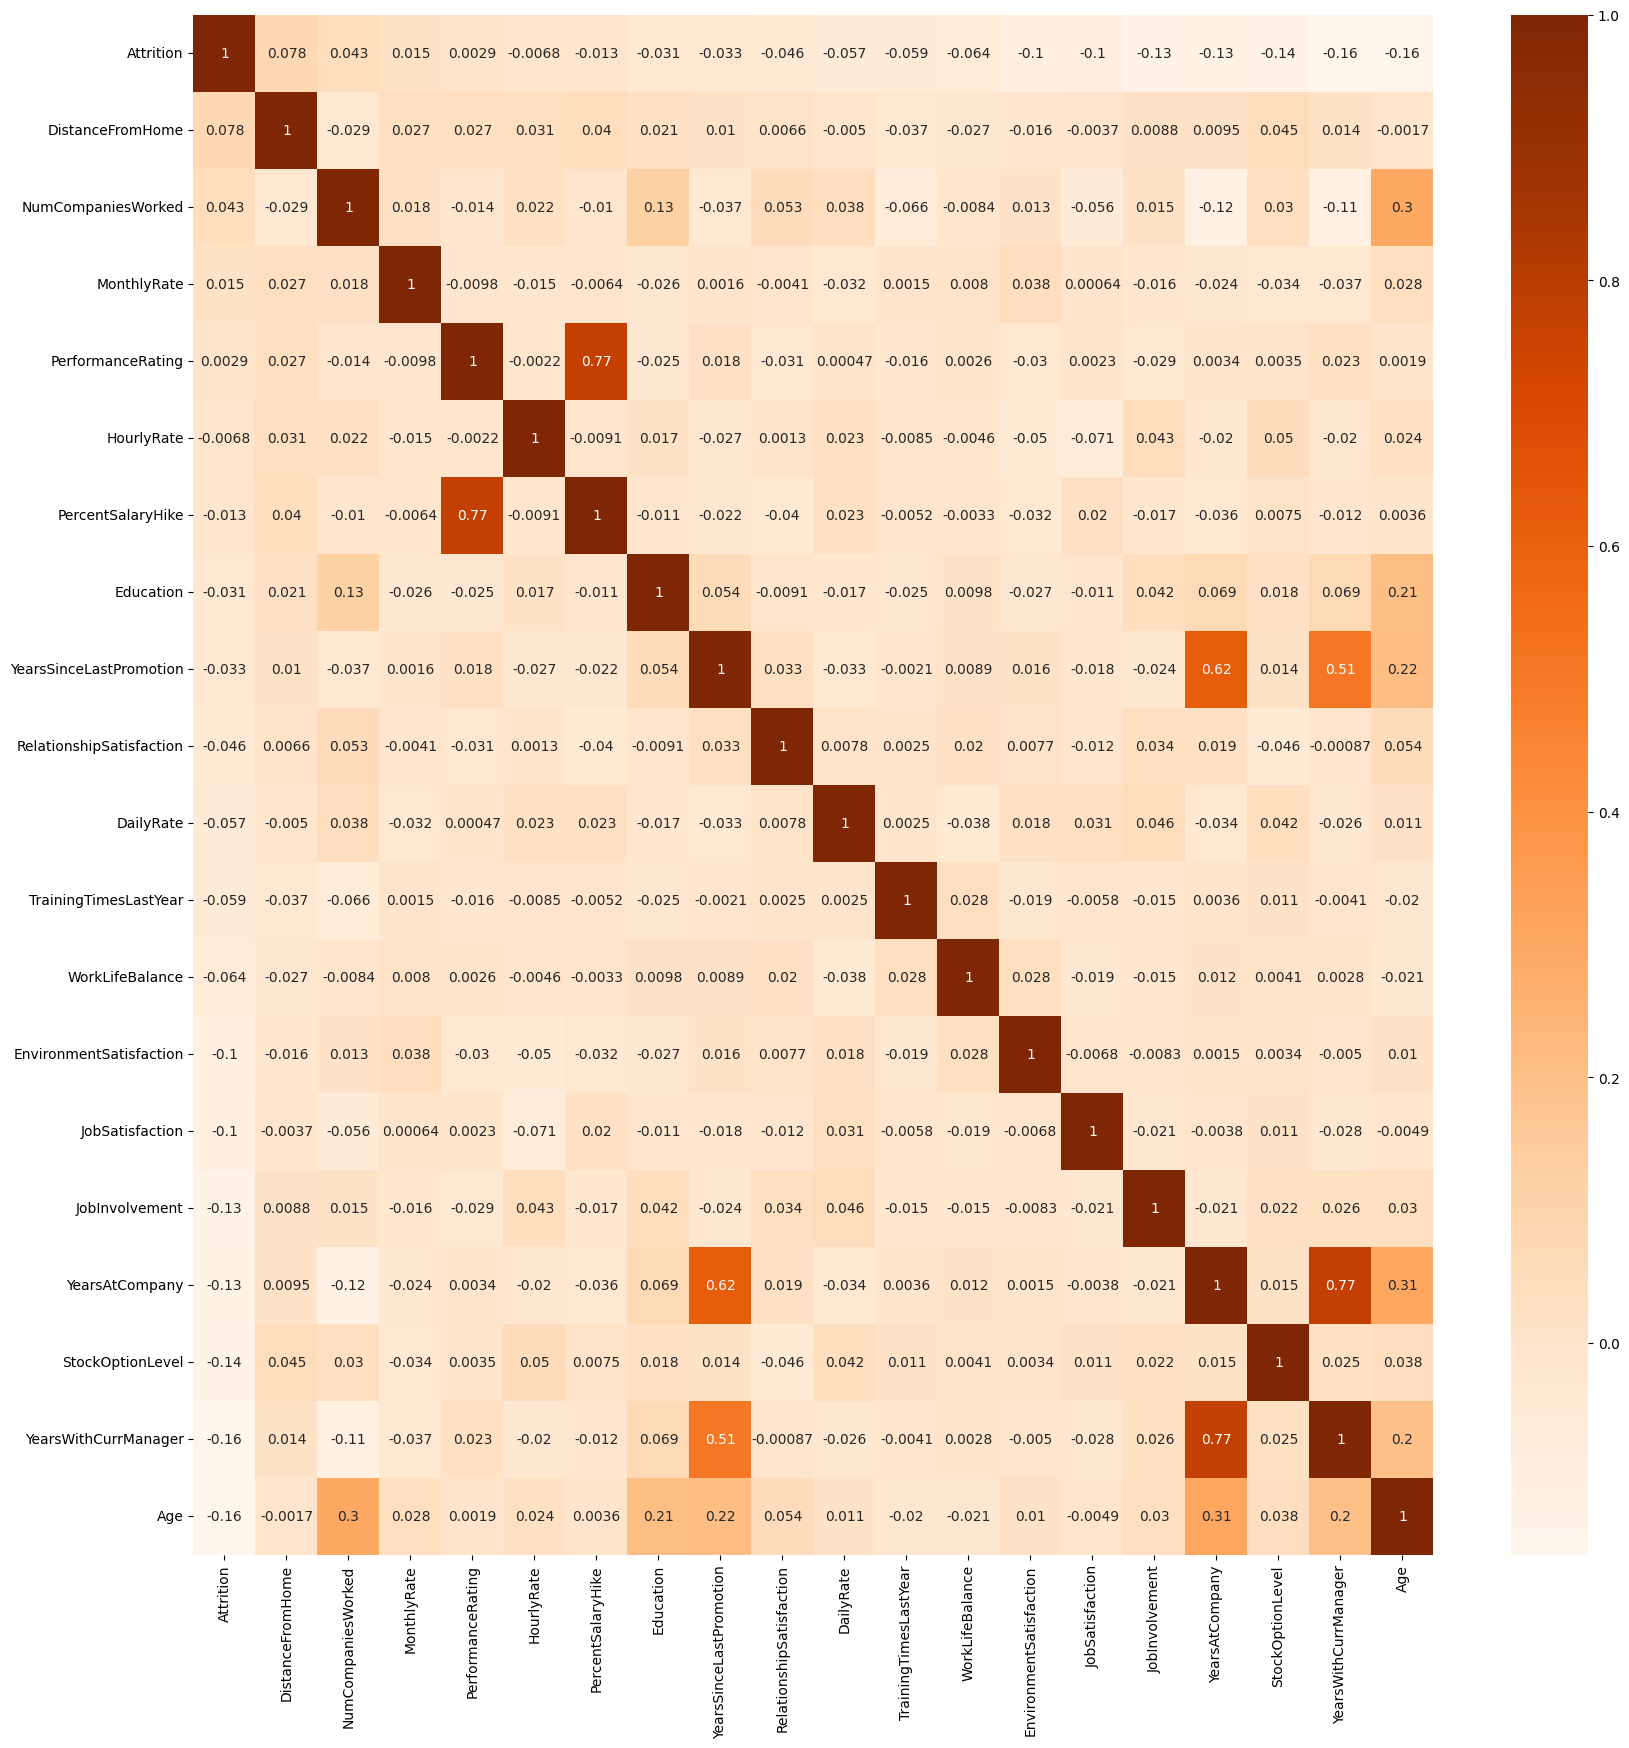

In [27]:
col = dataset.corr().nlargest(20, "Attrition").Attrition.index
plt.figure(figsize=(20, 20))
sns.heatmap(dataset[col].corr(), annot=True, cmap="Oranges", annot_kws={"size":10})

Segundo o mapa de calor de correlação das variáveis, a variavél distância de casa apresenta uma boa correlação positiva em relação a evasão dos funcionários.

## Conclusão

Nesta análise, identificamos que 16% dos colaboradores deixaram a organização no trimestre anterior, com mais da metade dessas saídas ocorrendo no departamento de Pesquisa e Desenvolvimento. Os cargos de nível mais elevado demonstram taxas de evasão mais baixas. No que diz respeito às funcionárias, a maior taxa de rotatividade foi observada no departamento de Recursos Humanos. Notavelmente, aproximadamente 1 em cada 4 funcionários que relataram um desequilíbrio significativo entre vida pessoal e profissional optaram por deixar a empresa, apesar da maioria dos que saíram ter avaliado sua satisfação no trabalho como boa ou excelente. Além disso, entre os ex-colaboradores, observou-se uma significativa disparidade salarial, com uma renda mensal média aproximadamente US$ 2.000 menor em comparação com os colaboradores atuais.